# Concrete Strength Predictor Project - Final Report

### Name: Abiraam Nagarajan
### R#: R11583022

## Objectives:
- Literature scan on concrete design, and utility of a predictive approach
- Analyse an existing concrete compressive strength database and build a data model to predict the compressive strength of a concrete mixture.
- Build an interface to allow users to enter concrete mixtures and return an estimated strength and an assessment of the uncertainty in the estimate
- Build an interface to allow users to add observations to the underlying database, and automatically update the Data Model to incorporate the new observations

## Literature Research

##### --> Describe the challenge of concrete mixture design and the importance of compressive strength.
#### --> Summarize the value of a data model in the context of the conventional approach to strength prediction

- The Concrete Compression Strength dataset contains numerous varieties of concrete compositions and the resulting product's compressive strength, which is a measure of how much load that kind of concrete can bear. The task for this dataset is to predict a concrete's compressive strength given its composition and mixture.
- The distinct proportion for cement to slag and to other variables causes the concrete properties to change, hence, making us establish the magnitude and structure based on the research questions in this analysis.
- The ratio between the different variables and different combinations of the variables help us attain the best possible Concrete Strength Combination.
- In this data analysis and user model building, a data model will be developed to accurately determine the output Concrete Strength based on the user input, thus helping the user decide on the best mixture of proportions

##### The Concrete Compressive Strength is a sophisticated data model and function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

#### - Cement (component 1) -x- Quantitative Data -x- kg in a m3 mixture 
#### - Blast Furnace Slag (component 2) -x- Quantitative Data -x- kg in a m3 mixture 
#### - Fly Ash (component 3) -x- Quantitative Data -x- kg in a m3 mixture 
#### - Water (component 4) -x- Quantitative Data -x- kg in a m3 mixture 
#### - Superplasticizer (component 5) -x- Quantitative Data -x- kg in a m3 mixture
#### - Coarse Aggregate (component 6) -x- Quantitative Data -x- kg in a m3 mixture 
#### - Fine Aggregate (component 7) -x- Quantitative Data -x- kg in a m3 mixture 
#### - Age -- Quantitative Data -x- Days (whole numbers) -x- Input Variable
#### - Concrete compressive strength -x- quantitative -- MPa -x- Output Variable

# Importing the required python libraries 

In [66]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.metrics as metrics
from sklearn import linear_model
import statsmodels.api as sm
import seaborn as sns
import itertools
%matplotlib inline 

# Reading the .csv dataset

In [2]:
 
concrete_data=pd.read_excel(r'concreteData.xls')
# displaying the concrete data
concrete_data


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


# Exploratory Data Analysis - Concrete Dataset

In [3]:
#finding the number of attributes and instances for the conrete dataset
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [4]:
# finding the statistical summary of the concrete dataset
concrete_data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [5]:
# determining the columns present in the dataset
concrete_data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [6]:
# Renaming the columns to clean the data
data1=concrete_data.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Bfs',
       'Fly Ash (component 3)(kg in a m^3 mixture)':'Fa',
       'Water  (component 4)(kg in a m^3 mixture)':'water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'super',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Ca',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fag', 
        'Age (day)':'Age',
       'Concrete compressive strength(MPa, megapascals) ':'Css'},
      inplace=True)

In [7]:
# displaying the rename data
data1


In [8]:
concrete_data.head()

,cement,Bfs,Fa,water,super,Ca,Fag,Age,Css
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [10]:
concrete_data.dtypes

cement    float64
Bfs       float64
Fa        float64
water     float64
super     float64
Ca        float64
Fag       float64
Age         int64
Css       float64
dtype: object

#### --> Here we can see that pretty much all the provided data belong to the numbers data type; specifically "float" with an exception of whole integer values for the age of the concrete in days.

In [11]:
concrete_data.shape

(1030, 9)

In [12]:
# Data check for missing values in the dataset

concrete_data.isnull().sum()

cement    0
Bfs       0
Fa        0
water     0
super     0
Ca        0
Fag       0
Age       0
Css       0
dtype: int64

In [13]:
concrete_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Bfs,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fa,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
super,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Ca,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fag,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
Css,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


<AxesSubplot:xlabel='cement'>

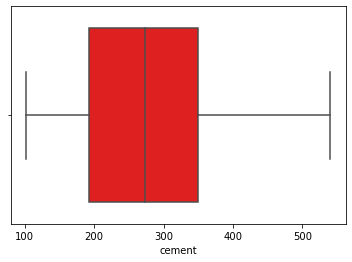

In [14]:
# Distribution Plot for Cement
sns.boxplot(x='cement', data=concrete_data, orient='h', color='red')

##### Here we see the distribution of values for 'Cement'. The lowest value appears to be close to 100 kgs in a m^3 mixture and the highest value appears to be 540 kgs in a m^3 mixture. The key distribution is centered around the 200-350 values.

<AxesSubplot:xlabel='Fa'>

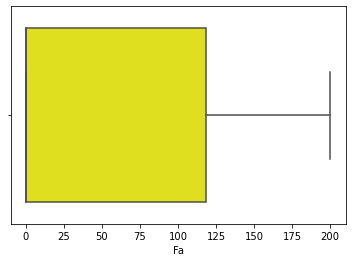

In [20]:
 # Distribution Plot for Fly Ash (kgs in a m^3 mixture)
sns.boxplot(x='Fa', data=concrete_data, orient='h', color='yellow')

#### Fly Ash Distribution Plot

<AxesSubplot:xlabel='water'>

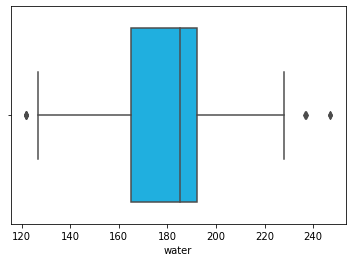

In [21]:
 # Distribution Plot for Water
sns.boxplot(x='water', data=concrete_data, orient='h', color='deepskyblue')

#### The distribution for water shows us that the minimum value lies between 120-140 kgs and that the maximum figures lie between 220 and 240 kgs. There are some points that are plotted outside of the max and min values and they appear to be outliers in the distribution data. 

<AxesSubplot:xlabel='Bfs'>

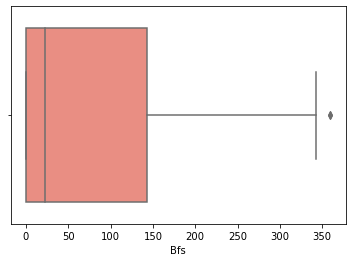

In [22]:
 # Distribution Plot for Blast Furnace Slag (kgs in a m^3 mixture)
sns.boxplot(x='Bfs', data=concrete_data, orient='h', color='salmon')

<AxesSubplot:xlabel='super'>

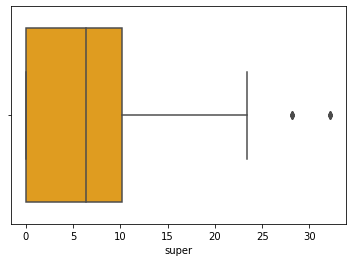

In [18]:
 # Distribution Plot for Superplasticizer (kgs in a m^3 mixture)
sns.boxplot(x='super', data=concrete_data, orient='h', color='orange')

<AxesSubplot:xlabel='Ca'>

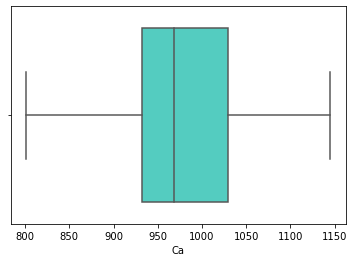

In [24]:
 # Distribution Plot for Coarse Aggregate (kgs in a m^3 mixture)
sns.boxplot(x='Ca', data=concrete_data, orient='h', color='Turquoise')

<AxesSubplot:xlabel='Fag'>

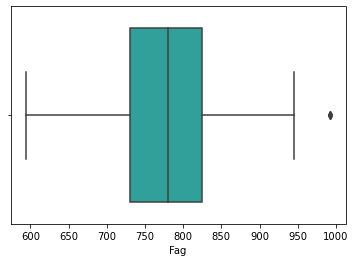

In [25]:
 # Distribution Plot for Fine Aggregate (kgs in a m^3 mixture)
sns.boxplot(x='Fag', data=concrete_data, orient='h', color='lightseagreen')

<AxesSubplot:xlabel='Age'>

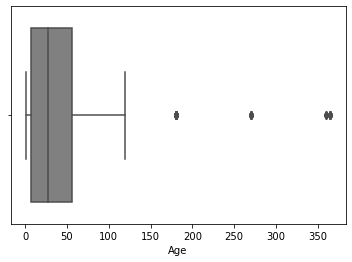

In [28]:
 # Distribution Plot for Concrete Age 
sns.boxplot(x='Age', data=concrete_data, orient='h', color='gray')

# Multivariate Analysis of Concrete Strength

#### Performing a multivariate analysis to see the distributions of all these variables together and how they affect the concrete strength. This allows us to take a closer look at the outliers and special cases

#### Plotting using seaborn distplot() to show histograms for each variable.

In [36]:
concrete_data.head()

,cement,Bfs,Fa,water,super,Ca,Fag,Age,Css
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Css', ylabel='Density'>

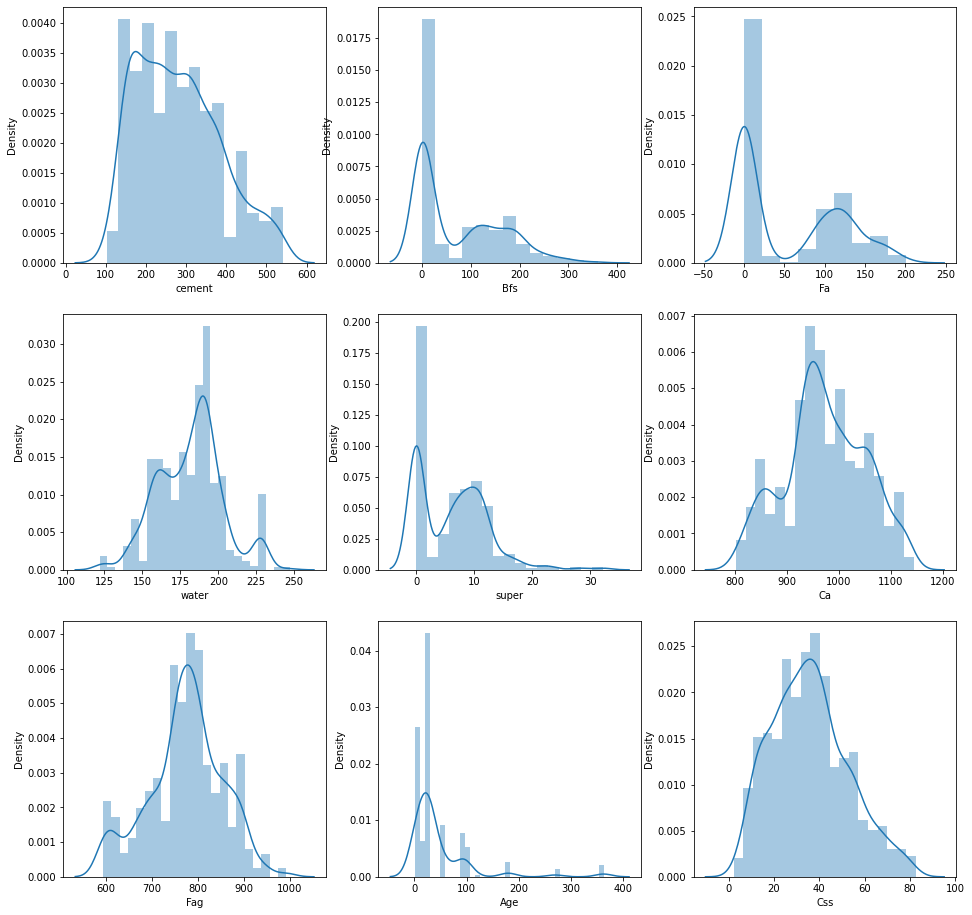

In [42]:
fig, ax2 = plt.subplots(3,3, figsize=(16,16))
sns.distplot(concrete_data['cement'], ax=ax2[0][0])
sns.distplot(concrete_data['Bfs'], ax=ax2[0][1])
sns.distplot(concrete_data['Fa'], ax=ax2[0][2])
sns.distplot(concrete_data['water'], ax=ax2[1][0])
sns.distplot(concrete_data['super'], ax=ax2[1][1])
sns.distplot(concrete_data['Ca'], ax=ax2[1][2])
sns.distplot(concrete_data['Fag'], ax=ax2[2][0])
sns.distplot(concrete_data['Age'], ax=ax2[2][1])
sns.distplot(concrete_data['Css'], ax=ax2[2][2])

## Inferences from the multivariate distplots: 

#### --> Cement data has a normal distribution with almost zero outliers. 
#### --> Blast Furnace Slag data is slightly skewed to the right and there are a couple outliers as well.
#### --> Fly Ash and Superplasticizer have two gaussians each and the data plot is skewed to the right
#### --> Water data seems normally distributed, similar to the cement data, but also appears slightly skewed to the left.
#### --> Coarse Aggregate and Fine Aggregate both appear normally distributed with some outliers for each.
#### --> Concrete Age data has multiple outliers and is skewed to the right.

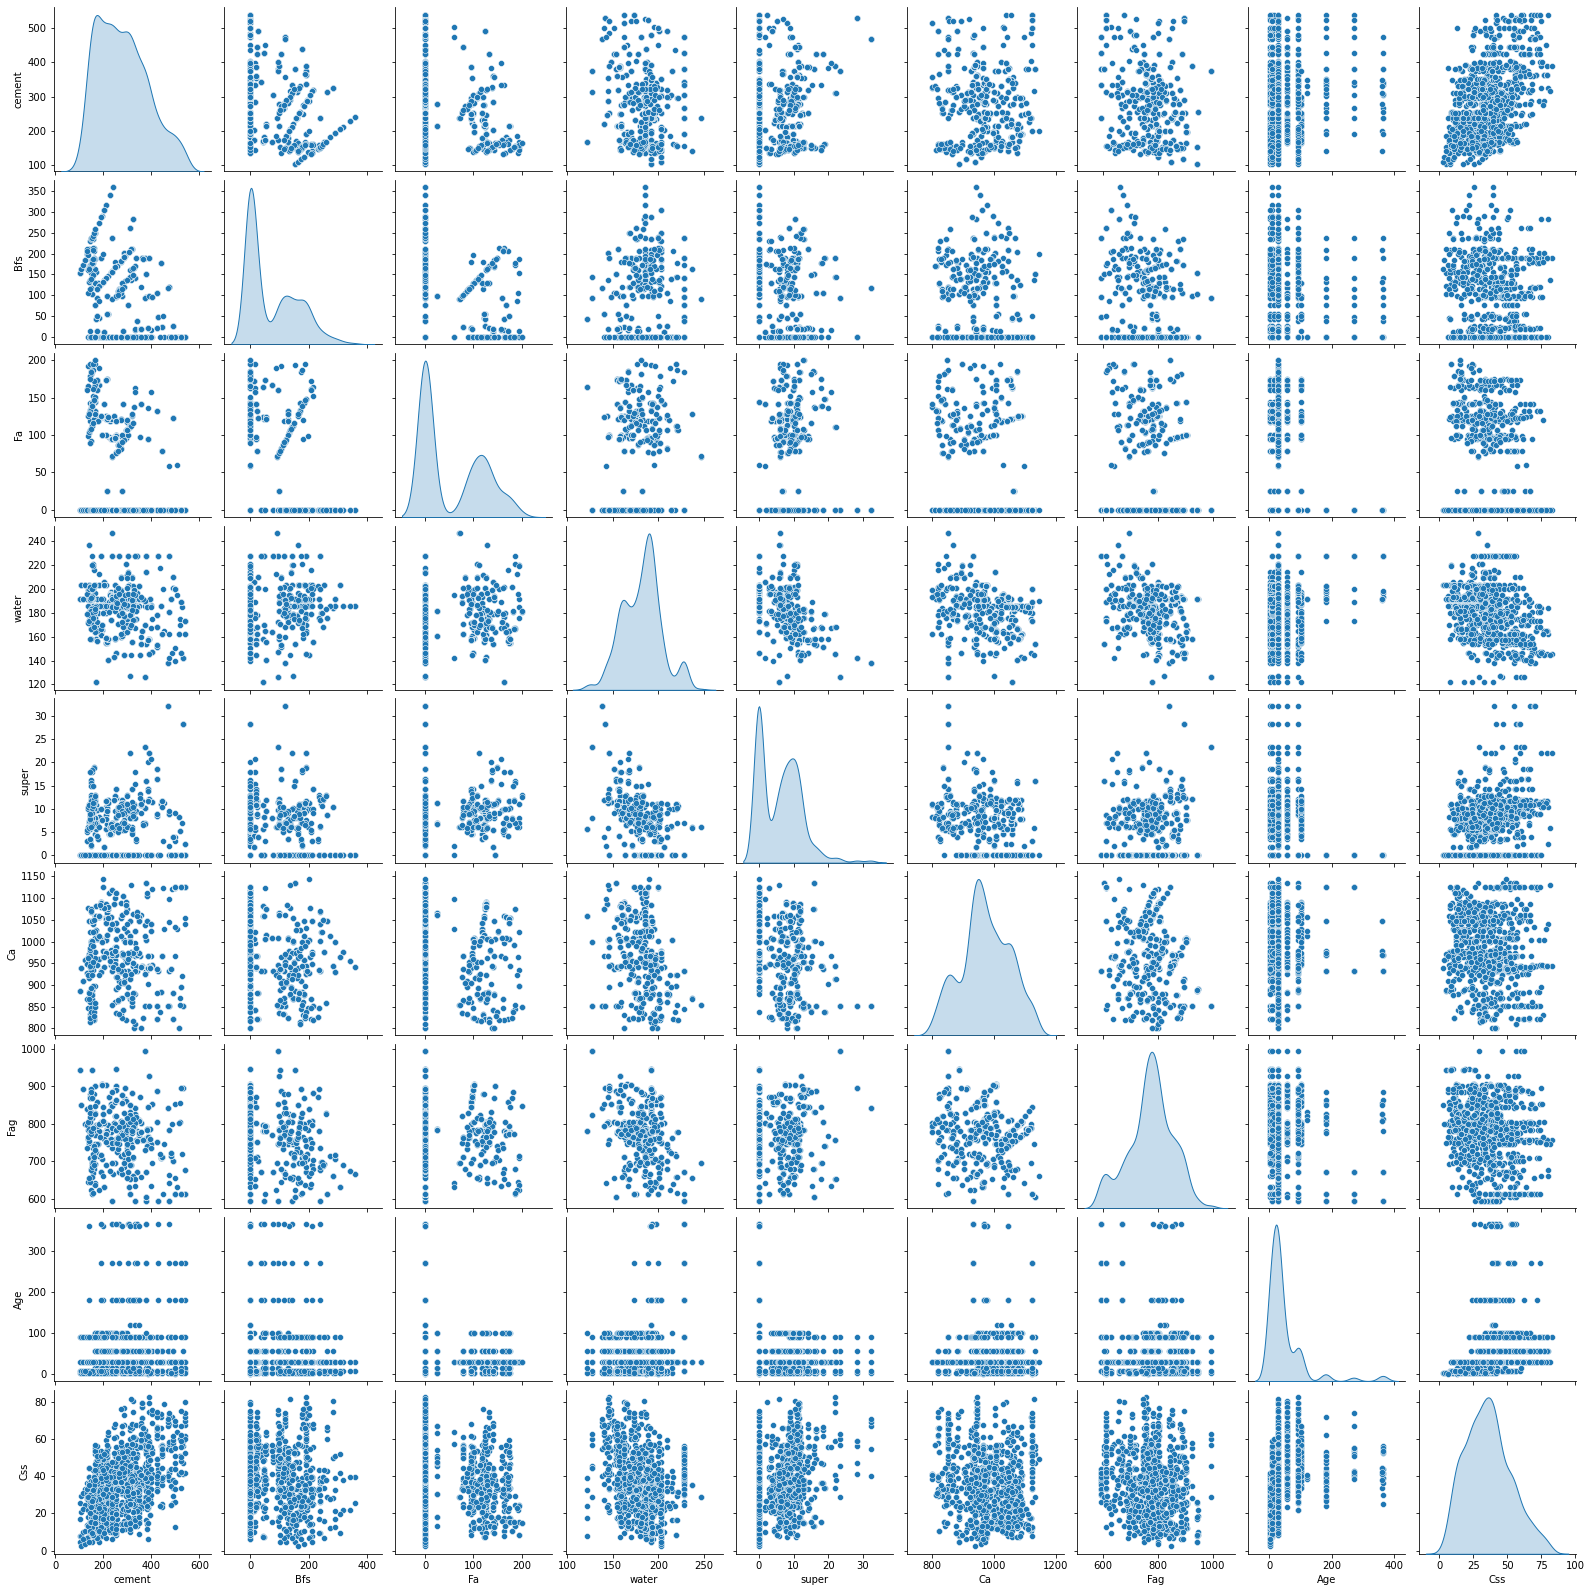

In [44]:
sns.pairplot(concrete_data, diag_kind='kde')

### Observations:

#### As the quantity of cement increases, the amount of slag does too. A pattern is visible in the first chart.
#### A closer look at the cement vs fly ash shows pattern with a negative slope, the amount of cement is inversely proportional to the amount of fly ash.
#### The trendline between cement vs superplasticizer is similar to that of cement vs slag.

# Correlation between variables

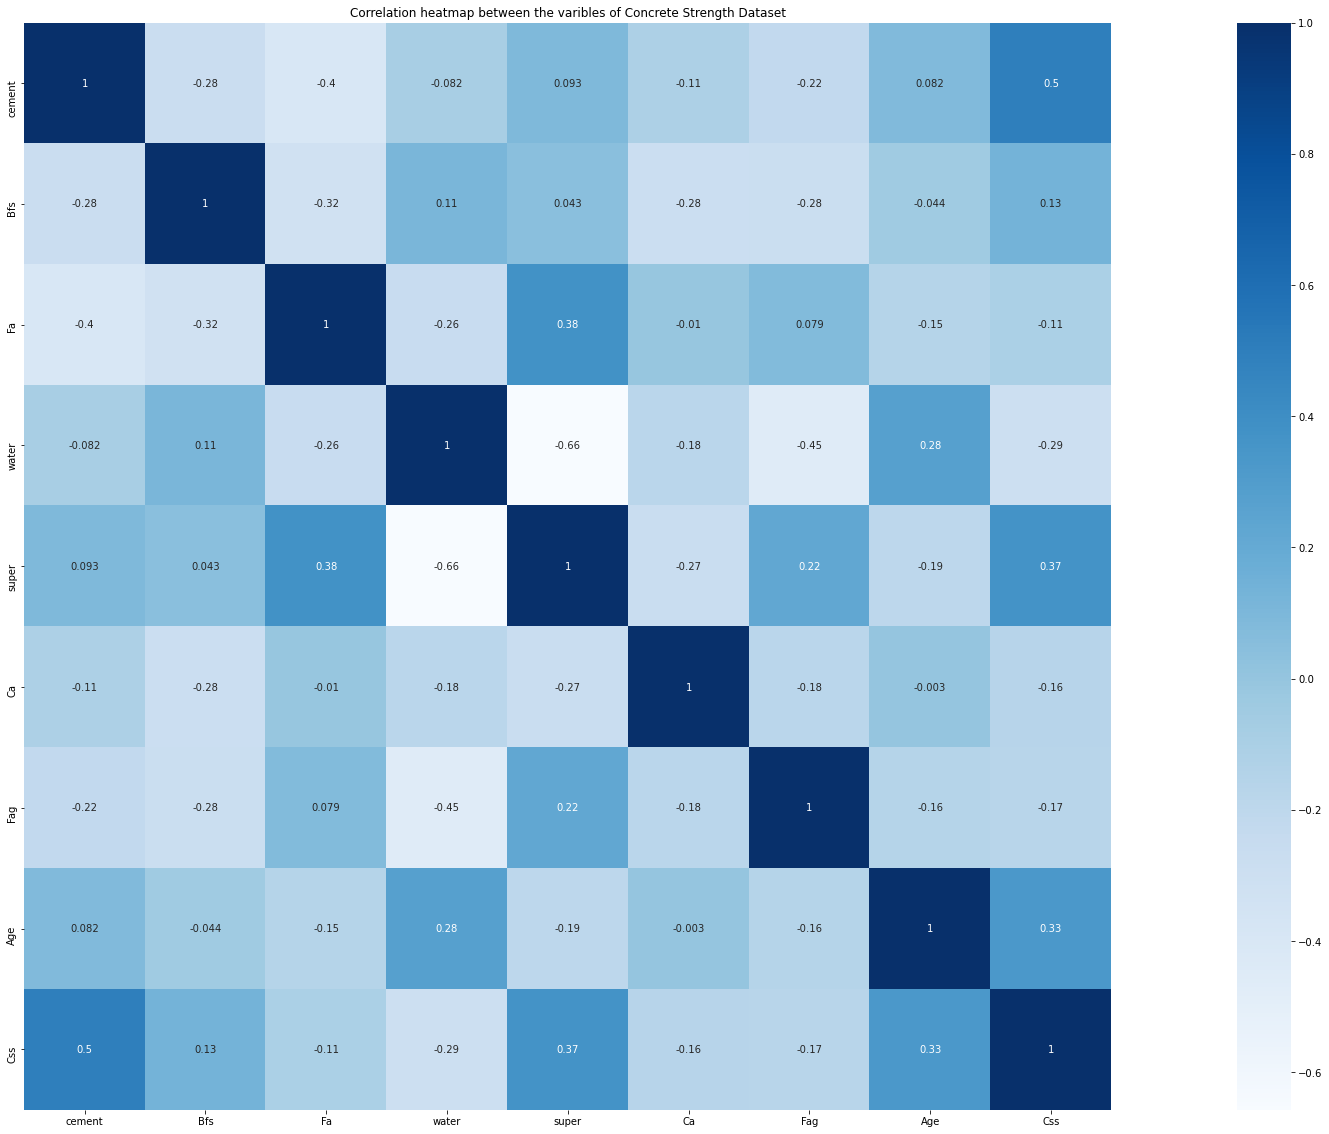

In [47]:
plt.figure(figsize=(45, 20))

sns.heatmap(concrete_data.corr(), vmax=1, square=True, annot=True, cmap='Blues')
plt.title('Correlation heatmap between the varibles of Concrete Strength Dataset')
plt.show()

#### This heatmap shows the correlation between the data variables such as cement, water, slag, fly ash, superplasticizer, Coarse and Fine Aggregate and Age along with the Concrete Strength Data. 
#### -> Cement and Superplasticizer seem to have the higher end of the positive correlation along with the Concrete Strength. 
#### -> Fly Ash and water seem to have a slightly negative correlation with Concrete Strength and it makes sense practically, as more water means the concrete gets weaker and takes a long time to set. 

<AxesSubplot:>

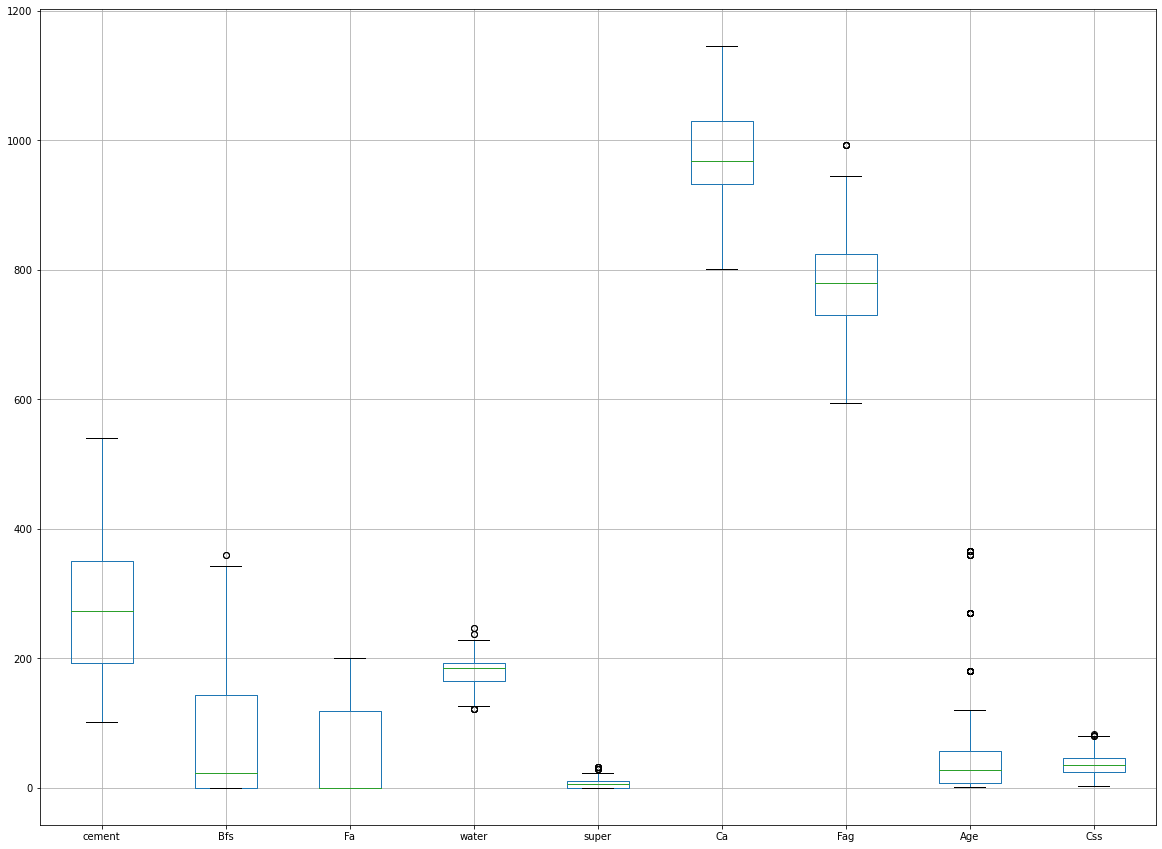

In [53]:
concrete_data.boxplot(figsize=(20,15))

#### This boxplot shows the outliers in the dataset specifically for each of the given variables. As mentioned earlier, Slag, water and superplastisizer have some outliers whereas the Concrete Age (in days) has many outliers and the data is rightly skewed

# Creating Strength Prediction Function with the x and y variables

## Implementation for the data model user interface.

In [77]:
# creating strength predicting function with the x and y variables
def strength_prediction():
    # Splitting the data set to X & Y; independent and dependent variables
    X=concrete_data[['cement','Bfs','Fa','water','super','Ca','Fag','Age']]
    Y=concrete_data['Css']
    
    # Linear Regression model for the dataset
    Regres=linear_model.LinearRegression()
    Regres.fit(X,Y)
    intercept=Regres.intercept_
    coef=Regres.coef_
    r=0
    
    # Function to identify individual variables according to the regression model
    for n in coef:
        if r==0:
            Bfs_coef=n
        if r==2:
            Fa_coef=n
        if r==3:
            Water_coef=n
        if r==4:
            super_coef=n
        if r==5:
            Ca_coef=n
        if r==6:
            Fag_coef=n
        if r==7:
            Age_coef=n
        r=r+1
        # r increments as to user input
        
    cement_amount=float(input('Please enter CEMENT quantity in Kg: '))
    # For user to input and store the value for quantity of cement 
    
    Bfs_amount=float(input('Please enter BLAST FURNANCE SLAG quantity in Kg: '))
    # For user to input and store the value for quantity of Blast Furnace Slag
    
    Fa_amount=float(input('Please enter FLY ASH quantity in Kg: '))
    # For user to input and store the value for quantity of Fly Ash
    
    water_amount=float(input('Please enter WATER quantity in Kg: '))
    # For user to input and store the value for quantity of Water
    
    super_amount=float(input('Please enter SUPERPLASTICIZER quantity in Kg: '))
    # For user to input and store the value for quantity of Superplasticizer
    
    Ca_amount=float(input('Please enter COARSE AGGREGATE quantity in Kg: '))
    # For user to input and store the value for Coarse Aggregate quantity
    
    Fag_amount=float(input('Please enter FINE AGGREGATE quantity in Kg: '))
    # For user to input and store the value for Fine Aggregate quantity
    
    Age=float(input('Please enter the amount of days for the mixture to set [whole number]: '))
    # For user to input and store the value for the amount of days
    predicted_value=Regres.predict([[cement_amount,Bfs_amount,Fa_amount,water_amount,
                                     super_amount,Ca_amount,Fag_amount,Age]])
    
    # Output for the function to display the predicted compressive strength
    print('The Predicted Compressive Strength for the mixture is approximately: ',predicted_value)
    print('')
    results=input('To Display Regression results, please press Y: ')
    print('')
    # Function to print the model based on the user input
    if results=='y' or results=='Y':
        X=sm.add_constant(X)
        model=sm.OLS(Y,X).fit()
        predictions=model.predict(X)
        print_model=model.summary()
        print(print_model)
        print('')

In [78]:
# Function to add the data input from the user

def concrete_mixture():
    
    add_cement=float(input('Please enter CEMENT quantity in Kg: '))
    
    add_Bfs=float(input('Please enter BLAST FURNANCE SLAG quantity in Kg: '))
    
    add_Fa=float(input('Please enter FLY ASH quantity in Kg: '))
    
    add_water=float(input('Please enter WATER quantity in Kg: '))
    
    add_super=float(input('Please enter SUPERPLASTICIZER quantity in Kg: '))
    
    add_Ca=float(input('Please enter COARSE AGGREGATE quantity in Kg: '))
    
    add_Fag=float(input('Please enter FINE AGGREGATE quantity in Kg: '))
    
    add_Age=float(input('Please enter the amount of days for the mixture to set [whole number]: '))
    
    add_Css=float(input('Finally, Enter the Compressive Strength of the Concrete mixture: '))
    
    # print output & append function to enter the calculated data
    print('')
    additions=[add_cement,add_Bfs,add_Fa,add_water,add_super,add_Ca,add_Fag,add_Age,add_Css]
    cocreate_data.append(additions)


# Updating the Conrete Compressive Strength Database

## Implementation for the Database Update Interface.


In [79]:
# Initialize
running=2
# this function allows users to modify or edit the dataset by adding values
tasks=input('To calculate the Concrete Compressive Strength, press C followed by Enter: ')

while running==2:
    if (tasks=='c' or tasks=='C' ):
        strength_prediction()
        tasks=input('To calculate the Concrete Compressive Strength again, press E followed by Enter: ')
        # Conditional function to validate the user input
        
        if (tasks=='c' or tasks=='E' ):
            running=1
            
    if (tasks=='a' or tasks=='A' ):
        concrete_mixture()
        tasks=input('To calculate the Conrete Compressive Strength again, press e followed by Enter: ')
        # Conditional function to validate the user input
        if (tasks=='c' or tasks=='E' ):
            running=1
    else:
        running=1
print('Program Completed...')


To calculate the Concrete Compressive Strength, press C followed by Enter: c
Please enter CEMENT quantity in Kg: 500
Please enter BLAST FURNANCE SLAG quantity in Kg: 500
Please enter FLY ASH quantity in Kg: 500
Please enter WATER quantity in Kg: 500
Please enter SUPERPLASTICIZER quantity in Kg: 500
Please enter COARSE AGGREGATE quantity in Kg: 500
Please enter FINE AGGREGATE quantity in Kg: 500
Please enter the amount of days for the mixture to set [whole number]: 500
The Predicted Compressive Strength for the mixture is approximately:  [279.02368621]

To Display Regression results, please press Y: y

                            OLS Regression Results                            
Dep. Variable:                    Css   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Thu, 09 Dec 2021   Prob (F-statistic):          6.76e-

# Testing the Regression model with Test Inputs
### The test inputs are values for the 8 variables based on the given combinations below.

|Cement|BlastFurnaceSlag|FlyAsh |CoarseAggregate|FineAggregate|Water|Superplasticizer|Age|
|:---|:---|:---|:---|:---|:---|:---|:---|
|175.0|13.0|172.0|1000.0|856.0|156.0|4.0|3.0|
|320.0|0.0|0.0|970.0|850.0|192.0|0.0|7.0|
|320.0|0.0|126.0|860.0|856.0|209.0|5.70|28.0|
|320.0|73.0|54.0|972.0|773.0|181.0|6.0|45.0|     
|530.0|359.0|200.0|1145.0|992.0|247.0|32.0|365.0|

## Test 1 - Combination given below

|Cement|BlastFurnaceSlag|FlyAsh |CoarseAggregate|FineAggregate|Water|Superplasticizer|Age|
|:---|:---|:---|:---|:---|:---|:---|:---|
|175.0|13.0|172.0|1000.0|856.0|156.0|4.0|3.0|

In [80]:
# Initialize
running=2
# this function allows users to modify or edit the dataset by adding values
tasks=input('To calculate the Concrete Compressive Strength, press C followed by Enter: ')

while running==2:
    if (tasks=='c' or tasks=='C' ):
        strength_prediction()
        tasks=input('To calculate the Concrete Compressive Strength again, press E followed by Enter: ')
        # Conditional function to validate the user input
        
        if (tasks=='c' or tasks=='E' ):
            running=1
            
    if (tasks=='a' or tasks=='A' ):
        concrete_mixture()
        tasks=input('To calculate the Conrete Compressive Strength again, press e followed by Enter: ')
        # Conditional function to validate the user input
        if (tasks=='c' or tasks=='E' ):
            running=1
    else:
        running=1
# End of program if user doesn't want to calculate regression model again
print('Program Completed...')


To calculate the Concrete Compressive Strength, press C followed by Enter: c
Please enter CEMENT quantity in Kg: 175
Please enter BLAST FURNANCE SLAG quantity in Kg: 13
Please enter FLY ASH quantity in Kg: 172
Please enter WATER quantity in Kg: 1000
Please enter SUPERPLASTICIZER quantity in Kg: 856
Please enter COARSE AGGREGATE quantity in Kg: 156
Please enter FINE AGGREGATE quantity in Kg: 4
Please enter the amount of days for the mixture to set [whole number]: 3
The Predicted Compressive Strength for the mixture is approximately:  [116.04101069]

To Display Regression results, please press Y: y

                            OLS Regression Results                            
Dep. Variable:                    Css   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Thu, 09 Dec 2021   Prob (F-statistic):          6.76e-206


## Test 2 - Combination given below

|Cement|BlastFurnaceSlag|FlyAsh |CoarseAggregate|FineAggregate|Water|Superplasticizer|Age|
|:---|:---|:---|:---|:---|:---|:---|:---|
|320.0|0.0|0.0|970.0|850.0|192.0|0.0|7.0|

In [81]:
# Initialize
running=2
# this function allows users to modify or edit the dataset by adding values
tasks=input('To calculate the Concrete Compressive Strength, press C followed by Enter: ')

while running==2:
    if (tasks=='c' or tasks=='C' ):
        strength_prediction()
        tasks=input('To calculate the Concrete Compressive Strength again, press E followed by Enter: ')
        # Conditional function to validate the user input
        
        if (tasks=='c' or tasks=='E' ):
            running=1
            
    if (tasks=='a' or tasks=='A' ):
        concrete_mixture()
        tasks=input('To calculate the Conrete Compressive Strength again, press e followed by Enter: ')
        # Conditional function to validate the user input
        if (tasks=='c' or tasks=='E' ):
            running=1
    else:
        running=1
        
# End of program if user doesn't want to calculate regression model again
print('Program Completed...')


To calculate the Concrete Compressive Strength, press C followed by Enter: c
Please enter CEMENT quantity in Kg: 320
Please enter BLAST FURNANCE SLAG quantity in Kg: 0
Please enter FLY ASH quantity in Kg: 0
Please enter WATER quantity in Kg: 970
Please enter SUPERPLASTICIZER quantity in Kg: 850
Please enter COARSE AGGREGATE quantity in Kg: 192
Please enter FINE AGGREGATE quantity in Kg: 0
Please enter the amount of days for the mixture to set [whole number]: 7
The Predicted Compressive Strength for the mixture is approximately:  [120.72383512]

To Display Regression results, please press Y: y

                            OLS Regression Results                            
Dep. Variable:                    Css   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Thu, 09 Dec 2021   Prob (F-statistic):          6.76e-206
Time

## Test 3 - Combination given below

|Cement|BlastFurnaceSlag|FlyAsh |CoarseAggregate|FineAggregate|Water|Superplasticizer|Age|
|:---|:---|:---|:---|:---|:---|:---|:---|
|320.0|0.0|126.0|860.0|856.0|209.0|5.70|28.0|

In [83]:
# Initialize
running=2
# this function allows users to modify or edit the dataset by adding values
tasks=input('To calculate the Concrete Compressive Strength, press C followed by Enter: ')

while running==2:
    if (tasks=='c' or tasks=='C' ):
        strength_prediction()
        tasks=input('To calculate the Concrete Compressive Strength again, press E followed by Enter: ')
        # Conditional function to validate the user input
        
        if (tasks=='c' or tasks=='E' ):
            running=1
            
    if (tasks=='a' or tasks=='A' ):
        concrete_mixture()
        tasks=input('To calculate the Conrete Compressive Strength again, press e followed by Enter: ')
        # Conditional function to validate the user input
        if (tasks=='c' or tasks=='E' ):
            running=1
    else:
        running=1
        
# End of program if user doesn't want to calculate regression model again
print('Program Completed...')


To calculate the Concrete Compressive Strength, press C followed by Enter: c
Please enter CEMENT quantity in Kg: 320
Please enter BLAST FURNANCE SLAG quantity in Kg: 0
Please enter FLY ASH quantity in Kg: 126
Please enter WATER quantity in Kg: 860
Please enter SUPERPLASTICIZER quantity in Kg: 856
Please enter COARSE AGGREGATE quantity in Kg: 209
Please enter FINE AGGREGATE quantity in Kg: 5.7
Please enter the amount of days for the mixture to set [whole number]: 28
The Predicted Compressive Strength for the mixture is approximately:  [152.90168609]

To Display Regression results, please press Y: y

                            OLS Regression Results                            
Dep. Variable:                    Css   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Thu, 09 Dec 2021   Prob (F-statistic):          6.76e-206

## Test 4 - Combination given below

|Cement|BlastFurnaceSlag|FlyAsh |CoarseAggregate|FineAggregate|Water|Superplasticizer|Age|
|:---|:---|:---|:---|:---|:---|:---|:---|
|320.0|73.0|54.0|972.0|773.0|181.0|6.0|45.0|

In [84]:
# Initialize
running=2
# this function allows users to modify or edit the dataset by adding values
tasks=input('To calculate the Concrete Compressive Strength, press C followed by Enter: ')

while running==2:
    if (tasks=='c' or tasks=='C' ):
        strength_prediction()
        tasks=input('To calculate the Concrete Compressive Strength again, press E followed by Enter: ')
        # Conditional function to validate the user input
        
        if (tasks=='c' or tasks=='E' ):
            running=1
            
    if (tasks=='a' or tasks=='A' ):
        concrete_mixture()
        tasks=input('To calculate the Conrete Compressive Strength again, press e followed by Enter: ')
        # Conditional function to validate the user input
        if (tasks=='c' or tasks=='E' ):
            running=1
    else:
        running=1
        
# End of program if user doesn't want to calculate regression model again
print('Program Completed...')

To calculate the Concrete Compressive Strength, press C followed by Enter: c
Please enter CEMENT quantity in Kg: 320
Please enter BLAST FURNANCE SLAG quantity in Kg: 73
Please enter FLY ASH quantity in Kg: 54
Please enter WATER quantity in Kg: 972
Please enter SUPERPLASTICIZER quantity in Kg: 773
Please enter COARSE AGGREGATE quantity in Kg: 181
Please enter FINE AGGREGATE quantity in Kg: 6
Please enter the amount of days for the mixture to set [whole number]: 45
The Predicted Compressive Strength for the mixture is approximately:  [114.63328852]

To Display Regression results, please press Y: y

                            OLS Regression Results                            
Dep. Variable:                    Css   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Thu, 09 Dec 2021   Prob (F-statistic):          6.76e-206
T

## Test 5 - Combination given below

|Cement|BlastFurnaceSlag|FlyAsh |CoarseAggregate|FineAggregate|Water|Superplasticizer|Age|
|:---|:---|:---|:---|:---|:---|:---|:---|
|530.0|359.0|200.0|1145.0|992.0|247.0|32.0|365.0|

In [85]:
# Initialize
running=2
# this function allows users to modify or edit the dataset by adding values
tasks=input('To calculate the Concrete Compressive Strength, press C followed by Enter: ')

while running==2:
    if (tasks=='c' or tasks=='C' ):
        strength_prediction()
        tasks=input('To calculate the Concrete Compressive Strength again, press E followed by Enter: ')
        # Conditional function to validate the user input
        
        if (tasks=='c' or tasks=='E' ):
            running=1
            
    if (tasks=='a' or tasks=='A' ):
        concrete_mixture()
        tasks=input('To calculate the Conrete Compressive Strength again, press e followed by Enter: ')
        # Conditional function to validate the user input
        if (tasks=='c' or tasks=='E' ):
            running=1
    else:
        running=1
        
# End of program if user doesn't want to calculate regression model again
print('Program Completed...')

To calculate the Concrete Compressive Strength, press C followed by Enter: c
Please enter CEMENT quantity in Kg: 530
Please enter BLAST FURNANCE SLAG quantity in Kg: 359
Please enter FLY ASH quantity in Kg: 200
Please enter WATER quantity in Kg: 1145
Please enter SUPERPLASTICIZER quantity in Kg: 992
Please enter COARSE AGGREGATE quantity in Kg: 247
Please enter FINE AGGREGATE quantity in Kg: 32
Please enter the amount of days for the mixture to set [whole number]: 365
The Predicted Compressive Strength for the mixture is approximately:  [258.25330474]

To Display Regression results, please press Y: y

                            OLS Regression Results                            
Dep. Variable:                    Css   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Thu, 09 Dec 2021   Prob (F-statistic):          6.76e-

# Test Results for the 5 Different Combinations
|Cement|BlastFurnaceSlag|FlyAsh |CoarseAggregate|FineAggregate|Water|Superplasticizer|Age|
|:---|:---|:---|:---|:---|:---|:---|:---|
|175.0|13.0|172.0|1000.0|856.0|156.0|4.0|3.0|
|320.0|0.0|0.0|970.0|850.0|192.0|0.0|7.0|
|320.0|0.0|126.0|860.0|856.0|209.0|5.70|28.0|
|320.0|73.0|54.0|972.0|773.0|181.0|6.0|45.0|     
|530.0|359.0|200.0|1145.0|992.0|247.0|32.0|365.0| 


- #### Test 1
- The Predicted Compressive Strength for the mixture is approximately:  [116.04101069]
- #### Test 2
- The Predicted Compressive Strength for the mixture is approximately:  [120.72383512]
- #### Test 3
- The Predicted Compressive Strength for the mixture is approximately:  [152.90168609]
- #### Test 4
- The Predicted Compressive Strength for the mixture is approximately:  [114.63328852]
- #### Test 5
- The Predicted Compressive Strength for the mixture is approximately:  [258.25330474]

### Conclusion: The Predicted Compressive Strength for 'TEST 5' seems to surpass all the other tests.

## Video Demonstration Link:

### https://www.youtube.com/watch?v=-2yPo3Ec5x4

## Resources

- https://www.youtube.com/watch?app=desktop&v=5NcbVYhQJvw
- https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce
- ENGR 1330 Lectures and Lab Files
- https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/

# MLA Citations

- Youtube.Com, 2021, https://www.youtube.com/watch?app=desktop&v=5NcbVYhQJvw. Accessed 9 Dec 2021.
- "Exploratory Data Analysis In Python.". Medium, 2019, https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce. Accessed 9 Dec 2021.
- "Exploratory Data Analysis(EDA) From Scratch | With Pythin Implementation". Analytics Vidhya, 2020, https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/. Accessed 9 Dec 2021.